<a href="https://colab.research.google.com/github/alouwyck/vives-machine-learning/blob/main/09_knn/1_knn_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

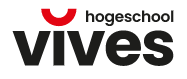<br>


**MACHINE LEARNING FUNDAMENTALS**<br>
Academiejaar 2023-2024<br>
Andy Louwyck

---



---



# K NEAREST NEIGHBORS: INTRO

## Thermostaat

In het inleidende hoofdstuk van dit vak hebben we een voorbeeld besproken met thermostaatdata. Daarin hebben we getoond dat één van de eenvoudigste oplossingen om te bepalen of de verwarming aan of uit staat bij een gegeven temperatuur erin bestaat om het label van het dichtstbijzijnde datapunt te nemen, in het Engels the nearest neighbor. En we hebben uitgelegd dat we ook de k dichtste punten kunnen nemen, in het Engels the **k nearest neighbors**!

We lezen de dataset opnieuw in:

In [ ]:
# read the dataset from the csv-file
import pandas as pd

df = pd.read_csv('thermostat.csv')
df.head()

,temperature,heating
0,19.5,off
1,21.2,off
2,20.0,off
3,19.4,off
4,18.2,on


In [ ]:
# create extra column 'heating_on' with corresponding 1/0 values
df['heating_on'] = (df.heating == 'on').astype(int)
df.head()

,temperature,heating,heating_on
0,19.5,off,0
1,21.2,off,0
2,20.0,off,0
3,19.4,off,0
4,18.2,on,1


In [ ]:
# create matrix with descriptive statistics
df.describe().T  # T = transpose

,count,mean,std,min,25%,50%,75%,max
temperature,100.0,18.729,2.900028,14.0,16.075,18.7,20.825,23.9
heating_on,100.0,0.500,0.502519,0.0,0.000,0.5,1.000,1.0


In [ ]:
# the dataset is balanced as 50 of 100 samples have label 'on'
df.heating_on.sum()

50

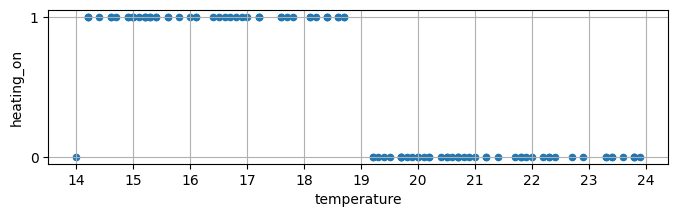

In [ ]:
# plot of label vs temperature
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots(1, 1, figsize=(8, 2))
df.plot.scatter(x='temperature', y='heating_on', ax=ax);
ax.set_yticks((0, 1));
ax.set_xticks(np.arange(14, 25));
ax.grid();

Dit was de functie die we hebben gedefinieerd waarin de **nearest neighbor** het label van een nieuwe temperatuur bepaalt:

In [ ]:
# function thermostat applying nearest neighbor
def thermostat(dataset):
    '''
    Asks user for temperature input and indicates whether the heating is on or off
    based on the nearest neighbor in the given dataset

    dataset: Pandas DataFrame with temperature values and corresponding labels
             Must have columns 'temperature' and 'heating'
    '''
    try:
        temperature = float(input('What is the temperature?\n\t'))
        difference = (dataset.temperature - temperature).abs()  # absolute differences
        id_nearest = difference.argmin()  # index of the minimum of the absolute differences
        heating = dataset['heating'].iloc[id_nearest]  # label of the nearest neighbor
        print(f"When the temperature is {temperature}°C, the heating is {heating}!")
    except ValueError:
        print('Not a valid temperature...')

In [ ]:
thermostat(df)

What is the temperature?
	18
When the temperature is 18.0°C, the heating is on!


In [ ]:
thermostat(df)

What is the temperature?
	14
When the temperature is 14.0°C, the heating is off!


Het laatste resultaat geeft een 'false negative' door de outlier in de dataset. Daarom kunnen we beter de **k nearest neighbors** nemen. Maar soms hebben die k dichtst gelegen datapunten andere labels. Hoe lossen we dat op? Wel, we nemen eenvoudigweg het meest voorkomende label. Dat noemen we de *modus*, in het Engels, *mode*.

In [ ]:
# function thermostat applying K Nearest Neighbors
def thermostat(dataset, k=3):
    '''
    Asks user for temperature input and indicates whether the heating is on or off
    based on the K nearest neighbors in the given dataset

    dataset: Pandas DataFrame with temperature values and corresponding labels
             Must have columns 'temperature' and 'heating'
    k: determines the number of nearest neighbors (integer, default is 3)
    '''
    try:
        temperature = float(input('What is the temperature?\n\t'))
        dataset['difference'] = (dataset.temperature - temperature).abs()  # absolute differences
        sorted = dataset.sort_values(by='difference')  # sort dataset by absolute differences
        k_nearest = sorted.iloc[:k]  # the first k records are the k nearest neighbors
        heating = k_nearest.heating.mode().item()  # get the mode of the k nearest neighbors labels
        print(f"When the temperature is {temperature}°C, the heating is {heating}!")
    except ValueError:
        print('Not a valid temperature...')

In [ ]:
thermostat(df, k=1)  # should give the same result as previous version

What is the temperature?
	18
When the temperature is 18.0°C, the heating is on!


In [ ]:
thermostat(df, k=5)  # set hyperparameter k to 5

What is the temperature?
	14
When the temperature is 14.0°C, the heating is on!


Door `k` gelijk te stellen aan 3 of een hoger getal, is het probleem van de outlier inderdaad opgelost!

**K Nearest Neighbors (KNN)** is een zeer gekend machine learning algoritme dat we in dit topic verder zullen toelichten. In het bijzonder zullen we hier het algoritme veralgemenen naar N dimensies, want het probleem dat we hier hebben opgelost is ééndimensionaal omdat we slechts één feature hebben, nl. de temperatuur.

In het volgende voorbeeld kunnen jullie het zelf al eens uitproberen met een ondertussen gekend tweedimensionaal probleem: dat van de e-mails. Maar deze keer is de dataset gelabeld en weten we welke mails gewenst zijn (ham) en welke ongewenst zijn (spam).

## E-mails

Lees de file `'mails_labeled.csv'` in:


Maak een scatterplot van de data.

Stop de features in een matrix `X` en de labels in vector `y`. Beiden zijn dus NumPy arrays. Controleer de shape. Zet de labels in `y` om naar integers.

Stel dat we 2 nieuwe mails binnen krijgen met size 15 en 30 en 2 en 5 ontvangers, respectievelijk. Stop deze twee nieuwe datapunten in een NumPy array `Xnew`.

Voeg deze twee datapunten toe aan de scatterplot. Je zal duidelijk zien dat de eerste mail gewenst is en de tweede ongewenst.

Schrijf een functie die de Euclidische afstand berekent tussen een nieuw datapunt `x` en alle datapunten in de gegeven dataset `X`. Maak gebruik van een gevectoriseerde expressie.

Bereken de afstanden tussen elk van de twee nieuwe datapunten en de punten in de dataset. Zorg dat je een NumPy array `D` krijgt met het aantal rijen gelijk aan het aantal punten in de dataset (dat is 9) en het aantal kolommen gelijk aan het aantal nieuwe datapunten (dat is 2).

Gebruik nu NumPy functie `argsort` om deze afstanden te sorteren van klein naar groot. Zorg ervoor dat de sortering per kolom gebeurt (dus `axis=0`!). Je krijgt nu voor elk nieuw punt de indices van de gelabelde datapunten gesorteerd van dichtst naar verst liggend. Ken de resulterende matrix toe aan variabele `idx`.

We nemen we de 5 dichtste punten. Definieer een variabele `k` die gelijk is aan 5.

Beperk matrix `idx` tot de eerste `k` rijen.

Gebruik `idx` als index matrix om de overeenkomstige labels uit `y` te selecteren. Je krijgt dus ook een 3x2 matrix. Stop die matrix in variabele `labels`.

Importeer functie `mode` uit module `scipy.stats`. Pas die functie toe op elke kolom van `labels` (`axis=0`!). Het resultaat zijn de voorspelde labels van de nieuwe punten!

De eerste mail is dus inderdaad gewenst, de tweede is spam!

---